In [304]:
# Importing Required Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [224]:
# Loading Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

Creating Validation Dataset

In [225]:
val_x = x_train[40000:]
val_y = y_train[40000:]
val_data.shape

(10000, 32, 32, 3)

In [226]:
# Updating Training Dataset
x_train=x_train[:40000]
y_train = y_train[:40000]
x_train.shape

(40000, 32, 32, 3)

In [227]:
type(x_train)

numpy.ndarray

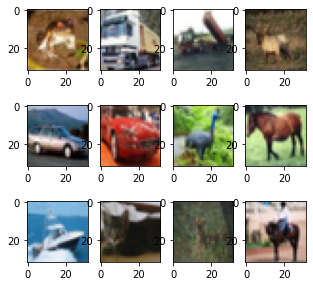

In [228]:
plt.figure(figsize=(5,5))
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(x_train[i])

All Classes

In [292]:
categories = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]

In [234]:
rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255)
]) 

In [235]:
# Dataagumentation is decreasing the overall performance of the model in this case.
#data_agumentation = tf.keras.Sequential([
#    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#    layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [236]:
modelCNN = models.Sequential([
    rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.BatchNormalization(),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.BatchNormalization(),
    
    layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.BatchNormalization(),

    layers.Flatten(),                    #Flattern the matrix before sending it to Dense Layer
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])



Compiling the Model

In [237]:
modelCNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #Because the data is not one-hot-encoded
              metrics=['accuracy'])
modelCNN.fit(x_train, y_train, validation_data = (val_x, val_y), epochs=15, verbose='auto')

Epoch 1/15
1250/1250 [==============================] - 64s 50ms/step - loss: 1.3716 - accuracy: 0.5070 - val_loss: 1.1868 - val_accuracy: 0.5794
Epoch 2/15
1250/1250 [==============================] - 64s 51ms/step - loss: 0.9943 - accuracy: 0.6501 - val_loss: 1.0224 - val_accuracy: 0.6368
Epoch 3/15
1250/1250 [==============================] - 63s 51ms/step - loss: 0.8316 - accuracy: 0.7107 - val_loss: 1.0983 - val_accuracy: 0.6333
Epoch 4/15
1250/1250 [==============================] - 65s 52ms/step - loss: 0.7114 - accuracy: 0.7517 - val_loss: 0.9042 - val_accuracy: 0.7014
Epoch 5/15
1250/1250 [==============================] - 62s 50ms/step - loss: 0.6272 - accuracy: 0.7807 - val_loss: 1.0267 - val_accuracy: 0.6653
Epoch 6/15
1250/1250 [==============================] - 62s 50ms/step - loss: 0.5490 - accuracy: 0.8087 - val_loss: 0.9216 - val_accuracy: 0.6985
Epoch 7/15
1250/1250 [==============================] - 64s 51ms/step - loss: 0.4755 - accuracy: 0.8329 - val_loss: 0.9817 -

Although the training accuracy is 92%, there is an over-fitting situation as validation accuracy is never above 71% and is stuck around 70%. Altered the layers a lot but did'nt got much benefit from it.

In [241]:
# Evaluating the model using test dataset.
modelCNN.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.5288 - accuracy: 0.6547


[1.528764009475708, 0.654699981212616]

In [300]:
# Predicting the Categories
output = modelCNN.predict(x_test)

Evaluation Chart

In [302]:
print("Predicted \t", "Orignal\t", "\tCorrect? \n")
for i in range(1000): 
    print(categories[np.argmax(output[i])],"\t \t", categories[int(y_test[i])], "\t\t\t", categories[np.argmax(output[i])]== categories[int(y_test[i])] )

Predicted 	 Orignal	 	Correct? 

cat 	 	 cat 			 True
ship 	 	 ship 			 True
ship 	 	 ship 			 True
plane 	 	 plane 			 True
deer 	 	 frog 			 False
dog 	 	 frog 			 False
car 	 	 car 			 True
cat 	 	 frog 			 False
dog 	 	 cat 			 False
truck 	 	 car 			 False
dog 	 	 plane 			 False
truck 	 	 truck 			 True
dog 	 	 dog 			 True
horse 	 	 horse 			 True
truck 	 	 truck 			 True
cat 	 	 ship 			 False
dog 	 	 dog 			 True
truck 	 	 horse 			 False
ship 	 	 ship 			 True
frog 	 	 frog 			 True
horse 	 	 horse 			 True
bird 	 	 plane 			 False
plane 	 	 deer 			 False
truck 	 	 truck 			 True
deer 	 	 dog 			 False
dog 	 	 bird 			 False
cat 	 	 deer 			 False
plane 	 	 plane 			 True
truck 	 	 truck 			 True
frog 	 	 frog 			 True
frog 	 	 frog 			 True
dog 	 	 dog 			 True
bird 	 	 deer 			 False
dog 	 	 dog 			 True
truck 	 	 truck 			 True
car 	 	 bird 			 False
horse 	 	 deer 			 False
car 	 	 car 			 True
truck 	 	 truck 			 True
dog 	 	 dog 			 True
plane 	 	 deer 			 False
frog 	

dog 	 	 horse 			 False
bird 	 	 frog 			 False
horse 	 	 horse 			 True
dog 	 	 dog 			 True
truck 	 	 truck 			 True
car 	 	 car 			 True
frog 	 	 frog 			 True
frog 	 	 bird 			 False
dog 	 	 dog 			 True
dog 	 	 dog 			 True
cat 	 	 dog 			 False
car 	 	 ship 			 False
cat 	 	 dog 			 False
truck 	 	 truck 			 True
bird 	 	 deer 			 False
frog 	 	 frog 			 True
deer 	 	 deer 			 True
cat 	 	 cat 			 True
bird 	 	 bird 			 True
plane 	 	 plane 			 True
horse 	 	 horse 			 True
dog 	 	 frog 			 False
bird 	 	 bird 			 True
deer 	 	 bird 			 False
dog 	 	 cat 			 False
truck 	 	 truck 			 True
dog 	 	 horse 			 False
truck 	 	 truck 			 True
deer 	 	 bird 			 False
dog 	 	 frog 			 False
horse 	 	 horse 			 True
cat 	 	 car 			 False
cat 	 	 cat 			 True
cat 	 	 frog 			 False
frog 	 	 frog 			 True
ship 	 	 ship 			 True
car 	 	 truck 			 False
horse 	 	 horse 			 True
dog 	 	 dog 			 True
deer 	 	 deer 			 True
plane 	 	 plane 			 True
ship 	 	 ship 			 True
dog 	 	 deer 			 False
p

Saving the Model

In [299]:
# Saving the model for future use.
modelCNN.save("classifier.h5")